In [8]:
!pip install -q kaggle

In [2]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

! chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [3]:
!kaggle datasets download -d devzohaib/dog-emotions-prediction

dog-emotions-prediction.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
!unzip /content/dog-emotions-prediction.zip

Archive:  /content/dog-emotions-prediction.zip
replace images/angry/100035066_bb2792d5c8_b.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace images/angry/10069504164_436856871c_b.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: a
error:  invalid response [a]
replace images/angry/10069504164_436856871c_b.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import os
import cv2
import random
from matplotlib import pyplot as plt

In [2]:
categories=['angry','happy']
a=r'/content/images/angry'
h=r'/content/images/happy'
dataset_path='/content/images'

In [3]:
def rgb2gray(rgb_img):
    red = rgb_img[:, :, 0]
    green = rgb_img[:, :, 1]
    blue = rgb_img[:, :, 2]

    gray_img = (
        0.2126 * red
        + 0.7152 * green
        + 0.0722 * blue)

    return gray_img


In [4]:
img_size=150
data=[]
for category in categories:
    folder=os.path.join(dataset_path,category)
    label=categories.index(category)
    for img in os.listdir(folder):
        img_path=os.path.join(folder,img)
        img_arr=cv2.imread(img_path)
        img_arr=cv2.resize(img_arr,(img_size, img_size))
        #img_arr=rgb2gray(img_arr)
        data.append([img_arr, label])

random.shuffle(data)        
len(data) 

7040

In [5]:
x=[]
y=[]
for i,j in data:
  x.append(i)
  y.append(j)

In [ ]:
x = np.array(x)
x/255

In [7]:
x.shape

(7040, 150, 150, 3)

In [8]:
y=np.array(y)
y= np.asarray(y).astype('float32').reshape((-1,1))
y.shape

(7040, 1)

In [22]:
y

array([[1.],
       [0.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

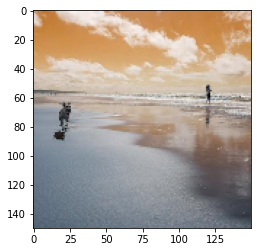

In [9]:
plt.imshow(x[0])

In [15]:
IMG_SIZE=[150,150]
vgg=tf.keras.applications.vgg16.VGG16(input_shape=IMG_SIZE+[3],weights='imagenet',include_top=False,)
for layer in vgg.layers:
  layer.trainable=False
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [19]:
l1=tf.keras.layers.Flatten()(vgg.output)
l2=tf.keras.layers.Dense(units=2,activation='sigmoid')(l1)
model=tf.keras.models.Model(inputs=vgg.input, outputs=l2)
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0   

In [26]:
model.compile(optimizer='adam',
                loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                metrics=['accuracy'])

In [27]:
hist=model.fit(x,y,epochs=5,verbose=1,validation_split=0.1)

Epoch 1/5
198/198 [==============================] - 27s 89ms/step - loss: 11.6093 - accuracy: 0.6428 - val_loss: 10.3589 - val_accuracy: 0.6648
Epoch 2/5
198/198 [==============================] - 17s 84ms/step - loss: 6.3335 - accuracy: 0.7456 - val_loss: 10.6798 - val_accuracy: 0.6634
Epoch 3/5
198/198 [==============================] - 17s 84ms/step - loss: 5.8034 - accuracy: 0.7771 - val_loss: 12.4938 - val_accuracy: 0.6392
Epoch 4/5
198/198 [==============================] - 18s 90ms/step - loss: 5.0587 - accuracy: 0.8032 - val_loss: 12.9472 - val_accuracy: 0.6207
Epoch 5/5
198/198 [==============================] - 17s 86ms/step - loss: 4.4225 - accuracy: 0.8193 - val_loss: 17.9404 - val_accuracy: 0.6960


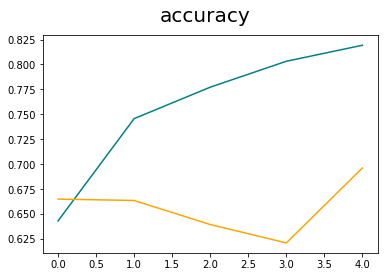

In [30]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('accuracy', fontsize=20)
plt.show()

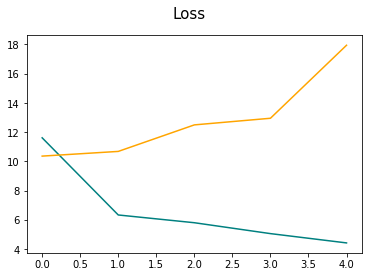

In [31]:
fig=plt.figure()
plt.plot(hist.history['loss'],color='teal', label='loss')
plt.plot(hist.history['val_loss'],color='orange', label='loss')
fig.suptitle('Loss', fontsize=15)
plt.show()

 **Need more data to better train the model**